# Data Analysis Project City Bike NYC

**Goals**
This dataset contains a sample of bike trips from the City Bike system in New York City.
Each row represents one trip and includes information about the start and end stations, the duration, the
user type, and other contextual data like age, season, temperature, and weekday.
Your goal is to explore this dataset and extract insights through data analysis with Pandas.

You'll practice basic pandas operations (loading, exploring, cleaning, transforming, summarizing) and use descriptive statistics and simple visualizations to support your answers.

## 1. Dataset Exploration

Environment requirements: Jupyter, Python, ipython, 
pandas openpyxl

In [17]:
%pip install pandas openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### What information does each column contain?

Each row contains a record of a trip or unit of service usage: a bicycle was collected by a user somewhere sometime, used for a certain period of time and returned. It also contains information about the user's demographics and whether or not they are enrolled service members.

Looking at the Dataframe we can see there are a few columns,
['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',<br>
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',<br>
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',<br>
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],<br>

```'Start Time'```, ```'Stop Time'```: Show when the bicycle was picked up and when it was returned.<br>
```'Start Station ID'```, ```'End Station ID'```: The IDs of stations where bicycles were collected and returned.<br>
```'Start Station Name'```, ```'End Station Name'```: The station names corresponding to the Station IDs (vid. infra.)<br>
```'Bike ID'```: the unique ID for the bike used for the trip.<br>
```'User Type'```: whether the user is a member or not.<br>
```'Birth Year'```, ```'Age'```, ```'Age Groups'```: user demographic information (vid. infra.)<br>
```'Trip Duration'```, ```'Trip_Duration_in_min'```: Time elapsed between bicycle collection and return. Available in seconds and minutes (vid. infra.)<br>
```'Month'```, ```'Season'```: Colums related to time of year. (NB. there appear to be records only for January through March.) <br>
```'Temperature'```: the only weather mesurement available in the dataset. This will likely hinder any advanced weather-related insight, as we have no
information about rain, snow, etc.<br>
```'Weekday'```: using this column we might know what age groups use bicycles more often, as well as test assumptions on current bicycle usage.<br><br>

There appears to be strong correlation among certain fields -- likely the result of calculated fields,

- ```'Birth Year'```, ```'Age'``` and ```'Age Groups'```
- ```'Trip Duration'``` and ```'Trip_Duration_in_min'``` (both are obtained from either ```'Start Time'``` or ```'Stop Time'``` as they are in full date format.)
- ```'Month'``` and ```'Season'```, ```'Weekday'``` (same as above.)

Also, there is some data duplication as there is no relational database, namely;

- ```'Start Station Name'``` and ```'End Station Name'``` will correspond to the same IDs (ie. ```'Start Station ID'``` or ```'End Station ID'```, respectively.)

In [3]:
# Load Pandas dataframe

import pandas as pd

df = pd.read_excel('ny_citibikes_raw.xlsx', sheet_name='NYCitiBikes')

# Test df has loaded up
df.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


In [4]:
# List column names

print(df.columns)

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')


### Are there missing or duplicated values?

We can see a single missing value in column **'End Station Name'** and *3,555 duplicate rows* across the dataset.

In [5]:
# isna, drop, null values?

# Check for missing values
print(df.isna().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")







Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Number of duplicate rows: 3555


We can either recover the End Station Name from the End Station ID, or just drop the row. Since this just affects one row and we don't know if the error might have corrupted other values it's probably best to just drop (delete) the row. 

In [6]:
# Find missing row and drop it.
print("Row count:", len(df))
print("Locating the row with missing values...")
missing_row = df[df['End Station Name'].isna()]
print("Total number of missing rows located: ", missing_row.shape[0])

print("Deleting rows with missing values...")
df = df.dropna(subset=['End Station Name'])
print("Rows deleted")
print("New row count:", len(df))


Row count: 20400
Locating the row with missing values...
Total number of missing rows located:  1
Deleting rows with missing values...
Rows deleted
New row count: 20399


Now let's delete the Duplicate Rows.

In [7]:
# Drop duplicate rows and chech row totals.

print("Row count:", len(df))
print("Total duplicate rows:", duplicate_rows)
print("Expected rows after duplicate deletion:",(len(df) - duplicate_rows))
print("Deleting duplicate rows...")
df = df.drop_duplicates()
print("New row count:", len(df))

Row count: 20399
Total duplicate rows: 3555
Expected rows after duplicate deletion: 16844
Deleting duplicate rows...
New row count: 16844


### What is the overall time span of the trips? (overall time range)


To calculate the overall time range, we find the oldest bicycle pickup timestamp, the most recent bicycle drop timestamp, and we subtract (newest - oldest).

In [8]:
# Find latest and newest record and subtract

oldest_timestamp = df['Start Time'].min()
newest_timestamp = df['Stop Time'].max()
print("Oldest trip start Timestamp:\t", oldest_timestamp)
print("Newest trip stop Timestamp:\t", newest_timestamp)
print("Overall time range:\t\t", (newest_timestamp - oldest_timestamp))



Oldest trip start Timestamp:	 2017-01-01 00:38:00
Newest trip stop Timestamp:	 2017-03-31 23:30:00
Overall time range:		 89 days 22:52:00


## 2. Basic Statistics

### What is the average trip duration (in minutes)?

In [9]:
avg_trip_mins = df['Trip_Duration_in_min'].mean()
print(f"Average trip duration: {avg_trip_mins:.2f} mins.")

Average trip duration: 9.58 mins.


### What is the minimum and maximum duration?

In [10]:
min_trip_mins = df['Trip_Duration_in_min'].min()
max_trip_mins = df['Trip_Duration_in_min'].max()
print("Minimum trip duration:",min_trip_mins)
print("Maximum trip duration:",max_trip_mins)

Minimum trip duration: 1
Maximum trip duration: 6515


### What are the most common start and end stations?

In [11]:
top_start_station = df['Start Station Name'].value_counts().head(1)
top_end_station = df['End Station Name'].value_counts().head(1)

print(f"Top start station:\t{top_start_station.index[0]}. Trip count:\t{top_start_station.iloc[0]}")
print(f"Top end station:\t{top_end_station.index[0]}. Trip count:\t{top_end_station.iloc[0]}")

# station_name = top_station.index[0]
# trip_count = top_station.iloc[0]

# print(top_start_station)
# print(top_end_station)

 

Top start station:	Grove St PATH. Trip count:	2115
Top end station:	Grove St PATH. Trip count:	2743


## 3. Users and Demographics

### How many unique bikes were used?

We use ```.nunique()``` which is the unique count method. It returns the count of all distinct values of a a column, in this case *'Bike ID'*.

In [12]:
unique_bikes = df["Bike ID"].nunique()
print("Total bikes used (unique): ", unique_bikes)

Total bikes used (unique):  500


### What are the proportions of user types (Subscriber vs Customer)?

We need to tweak ```df.value_counts()``` to show our percentages.
- *value.counts()* by itself only returns each each class member's row count
- *value_counts(normalize=True)* divides said row count by total rows --> Decimal proportion
- *.mul(100)* multiplies by 100 to get the percentage

To list the user types and percentages we will generalise using the method ```.items()``` in an attempt to make the code more reusable.


In [13]:
user_types = df['User Type'].value_counts(normalize=True).mul(100).round(2)


# There are only 2 user types in this case, so we could use
 # print(user_types.index[0], user_types.iloc[0])
 # print(user_types.index[1], user_types.iloc[1])

# But let's try and generalise to cater for any number of class members. 

print("User Type\tType percentage\n================================")

for user_type_name, user_type_percentage in user_types.items():
    print(f"{user_type_name}\t{user_type_percentage:.1f}%")


    


# print(user_types.items())


# print(user_types.iloc[0])
# print(user_types.iloc[1])


#print(f'''User Type\t\Type percentage
#      ================================
#      {user_types.index[1]})
#      '''


# print(f"Top start station:\t{top_start_station.index[0]}. Trip count:\t{top_start_station.iloc[0]}")
# print(f"Top end station:\t{top_end_station.index[0]}. Trip count:\t{top_end_station.iloc[0]}")


      

      


User Type	Type percentage
Subscriber	98.1%
One-time user	1.9%


Let's make a simple pie chart.

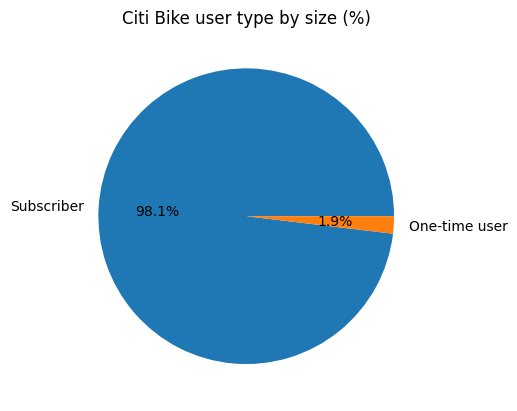

In [18]:
import matplotlib.pyplot as plt

# We'll use .index and .values as lists ("Duck typing")
labels = user_types.index
sizes = user_types.values

# Plot the chart 
#   ( autopct='%1.1f%%' --> to show percentages inside each slice)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Citi Bike user type by size (%)')
plt.show()

### What is the age distribution of the users? <br>Which age group uses the service the most?

As we can see below, the 35-44 age group is the most frequent service user group.

In [19]:
# User age distribution
# Same as previous step, but we need to sort by user age as well

user_ages = df['Age Groups'].value_counts(normalize=True).mul(100).round(2)

# Sort by user age
user_ages = user_ages.sort_index()

print("User age bucket\t\tPercentage\n===================================")

for user_age_bucket, user_age_percentage in user_ages.items():
    print(f"{user_age_bucket}\t\t\t{user_age_percentage:.1f}%")


# labels = user_ages.index
# sizes = user_ages.values

User age bucket		Percentage
18-24			0.3%
25-34			23.8%
35-44			45.7%
45-54			17.6%
55-64			8.6%
65-74			3.6%
75+			0.3%


To highlight the age group uses the service the most, we can just pick out the highest-percentage bucket with a one-liner like so;


In [20]:
print("Most frequent service user group:", df['Age Groups'].value_counts().head(1).index[0])

Most frequent service user group: 35-44


Let's make a pie chart and see how it looks.

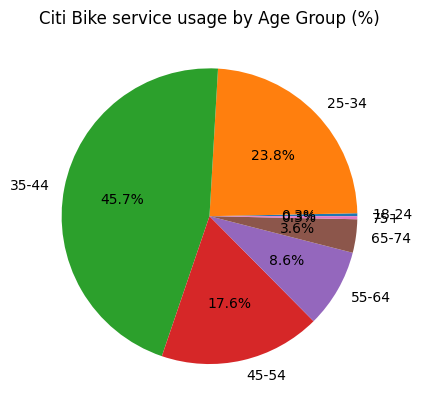

In [21]:
# We'll use .index and .values as lists ("Duck typing")
labels = user_ages.index
sizes = user_ages.values

# Plot the chart 
#   ( autopct='%1.1f%%' --> to show percentages inside each slice)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Citi Bike service usage by Age Group (%)')
plt.show()

Since we have a few groups with small percentage values, they clump together in the pie chart. To add insult to injury such groups aren't in a continuous age range, so grouping them together wouldn't be the cleanest option in our opinion.<br>Let's try a **Bar Chart** instead.

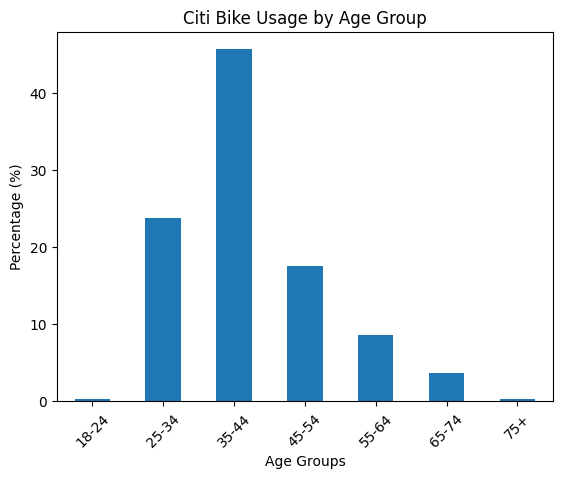

In [22]:
user_ages.plot(kind='bar')
plt.title('Citi Bike Usage by Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

Now it's much easier to spot the age groups with smaller values.<br>Another benefit of the bar chart over the pie chart is a tidy layout of age groups in ascending order (cf. x-axis) for quick reference, while the highest and lowest values are still easily spotted as they stand out visually.

## 4. Temporal Analysis

### How does the number of trips vary by weekday?

First we make sure all timestamps are healthy -- they are.

In [23]:
# Check timestamp health
print("Bad Start Time Timestamps: ",(pd.to_datetime(df['Start Time'], errors='coerce').isna().sum()))
print("Bad Stop Time Timestamps: ",(pd.to_datetime(df['Stop Time'], errors='coerce').isna().sum()))

Bad Start Time Timestamps:  0
Bad Stop Time Timestamps:  0


Next, we organise all trips by weekday and reindex.
<br>NB. Since the column 'Weekday' is a string, we need to manually provide the order of the days of the week.



In [24]:
# 
trips_by_weekday = df['Weekday'].value_counts()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_weekday = trips_by_weekday.reindex(weekday_order)

print(trips_by_weekday)


Weekday
Monday       2526
Tuesday      2460
Wednesday    3301
Thursday     2953
Friday       2449
Saturday     1590
Sunday       1565
Name: count, dtype: int64


Let's plot another bar chart to show these values.

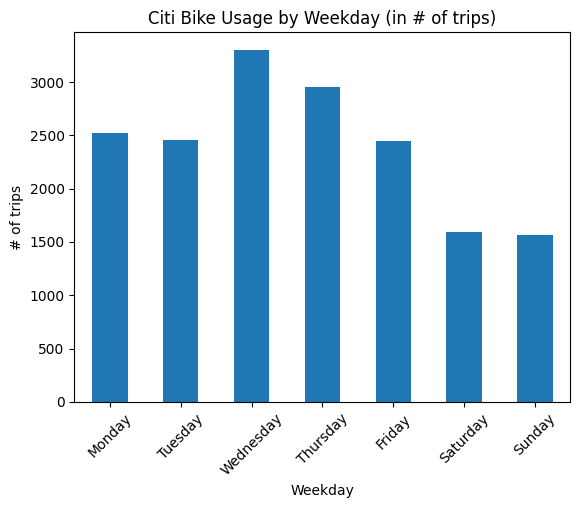

In [25]:
# Bar Chart

trips_by_weekday.plot(kind='bar')
plt.title('Citi Bike Usage by Weekday (in # of trips)')
plt.ylabel('# of trips')
plt.xticks(rotation=45)
plt.show()


Now we can clearly see peak usage occurs on Wednesdays and Thursdays, and the trough on Saturdays and Sundays.

### Which month or season has the most rides?

We'll focus on months.

In [26]:
trips_by_month = df['Month'].value_counts()
top_rides_month = trips_by_month.idxmax()

# Let's show the month name as well.
Month_Names = {1:'January', 2:'February', 3: 'March'}

print(f"The month No. with most rides is: {top_rides_month} ({Month_Names[top_rides_month]})")


The month No. with most rides is: 3 (March)


### What time of day do most trips start?

Before we apply ```value_counts()``` we must first split by hour.<br>
Let's add a "Start Hour" column to the dataset for convenience.

In [27]:
# Create a new column "Start Hour"
df['Start Hour'] = df['Start Time'].dt.hour

# Calculate top hour and trip count, show results
top_start_hour = df['Start Hour'].value_counts().idxmax()
top_start_hour_trips = df['Start Hour'].value_counts().max()
print(f"Most common hour (24 hr): {top_start_hour}.\nTotal trips in that hour: {top_start_hour_trips}.")

Most common hour (24 hr): 8.
Total trips in that hour: 2196.


## 5. Geographic Analysis

### Which station pairs (start → end) appear most often?

We can create a new column to gather trips and just apply ```value.counts()``` to them.

In [36]:
df['Trips'] = df['Start Station Name'] + ' > ' + df['End Station Name']
print("Most common trip routes\n=====================================")
df['Trips'].value_counts().head(5)

Most common trip routes


Trips
Hamilton Park > Grove St PATH    401
Morris Canal > Exchange Place    366
Dixon Mills > Grove St PATH      293
Exchange Place > Morris Canal    290
Grove St PATH > Hamilton Park    273
Name: count, dtype: int64


### Are there any stations that appear only as start or only as end stations?

We can save the unique values for each station type, the subtract the sets both ways.
Let's use a function to show the data.<br>
As we can see in the results below, there are no unique start station names

In [55]:
start_stations = set(df['Start Station Name'].unique())
end_stations = set(df['End Station Name'].unique())

start_only_stations = start_stations - end_stations
end_only_stations = end_stations - start_stations



def show_stations(station_set, station_set_name):
    print(f"Showing records for {station_set_name}\n==============================================")
    if len(station_set) == 0:
        print("There are no records of: ", station_set_name, "\n")
    else:
        for station in station_set:
            print(station)
    


show_stations(start_only_stations, "start-only Stations")
show_stations(end_only_stations, "end-only Stations")

# for station in start_only_stations:
#    print(station)

# print(len(start_only_stations))
# print(len(end_only_stations))

Showing records for start-only Stations
There are no records of:  start-only Stations 

Showing records for end-only Stations
Warren St & Church St
JCBS Depot
Indiana
W 45 St & 8 Ave
Broadway & W 36 St
E 15 St & 3 Ave


## 6. Temperature and Duration

### Is there any visible relationship between temperature and trip duration?

This is called a *bivariate correlation analysis*, because it uses 2 variables -- in this case *temperature* and *trip duration*.
We can use the method ```df.corr()``` which calculates Pearson's correlation coefficient. The scale of results are shown like this;
- -1 or near: Strong negative correlation (ie. as one value increases the other decreases proportionally)
-  0 or near: No correlation (ie. no linear relationship)
- +1 or near: Strong positive correlation (ie. as one value increases the other increases proportionally)

In this particular instance, as we can see below, there is no correlation.

In [58]:
# Pearson correlation coefficient

correlation_r = df['Trip_Duration_in_min'].corr(df['Temperature'])
print("The Pearson correlation coefficient is:", correlation_r)

The Pearson correlation coefficient is: -0.0030341148711691916


### How does average trip duration vary by season?

asd

In [ ]:
# AVG trip duration variance by Season

## 7. Summary and Interpretation

Write a short summary (5–10 lines) of your findings.
Mention patterns, anomalies, or interesting trends you observed.

asd